# Support Vector Classifier Strategy Code

## Importing libraries

In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web

## Fetching the data

In [2]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 1, 1)
Df = web.DataReader("^GSPC", 'yahoo', start, end)
Df = Df.dropna()
Df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


## Define the explanatory variables

In [3]:
# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X= Df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2018-01-02,-12.080078,13.529785
2018-01-03,-15.209961,16.600098
2018-01-04,-4.679932,10.219971
2018-01-05,-11.819824,15.530029
2018-01-08,-5.040039,10.909912


## Defining target variable

Target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow's price is greater than today's price then we will buy the S&P500 index, else we will sell the S&P500 index. We will store +1 for a buy signal and -1 for a sell signal in y.

In [4]:
# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

## Split the data into train and test

In [5]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split] 

# Test data set
X_test = X[split:]
y_test = y[split:]

## Support Vector Classifier

In [6]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 90.30%
Test Accuracy: 57.43%


## Strategy implementation with SVC

### Predict signal 

We will predict the signal (buy or sell) for the test data set, using the cls.predict() function.

### Compute returns in the test period

We will compute the strategy returns based on the predicted signal, and then save it in the column 'geometric returns' and plot the geometric returns.

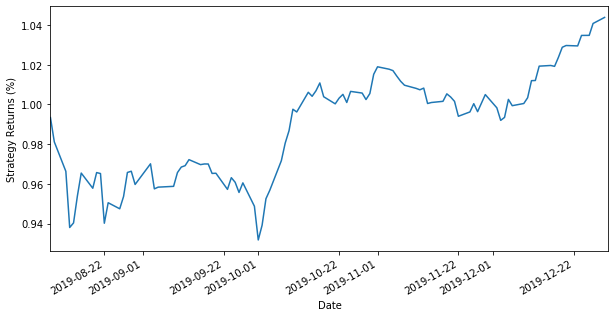

In [8]:
# Predicted Signal
Df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
Df['Return'] = (Df['Close'].shift(-1) - Df['Close'])/Df['Close']

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

## Strategy implementation with Logistic Regression

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# train and test accuracy
accuracy_train1 = accuracy_score(y_train, classifier.predict(X_train))
accuracy_test1 = accuracy_score(y_test, classifier.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train1*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test1*100))


Train Accuracy: 54.48%
Test Accuracy: 60.40%


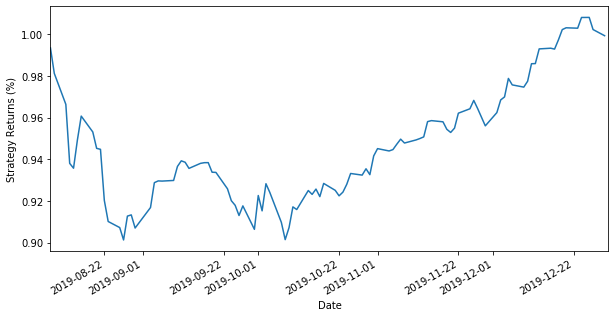

In [11]:
# Predicted Signal
Df['Predicted_Signal'] = classifier.predict(X)

# Calculate daily returns
Df['Return'] = (Df['Close'].shift(-1) - Df['Close'])/Df['Close']

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

## kNN strategy

In [12]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifierk = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifierk.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifierk.predict(X_test)

In [13]:
# train and test accuracy
accuracy_train2 = accuracy_score(y_train, classifierk.predict(X_train))
accuracy_test2 = accuracy_score(y_test, classifierk.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train2*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test2*100))


Train Accuracy: 76.12%
Test Accuracy: 48.51%


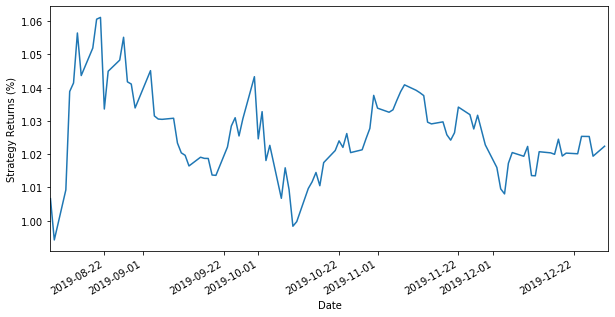

In [14]:
# Predicted Signal
Df['Predicted_Signal'] = classifierk.predict(X)

# Calculate daily returns
Df['Return'] = (Df['Close'].shift(-1) - Df['Close'])/Df['Close']

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()

## Random Forest

In [15]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifierRF.predict(X_test)

In [16]:
# train and test accuracy
accuracy_trainRF = accuracy_score(y_train, classifierRF.predict(X_train))
accuracy_testRF = accuracy_score(y_test, classifierRF.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_trainRF*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_testRF*100))


Train Accuracy: 96.77%
Test Accuracy: 55.45%


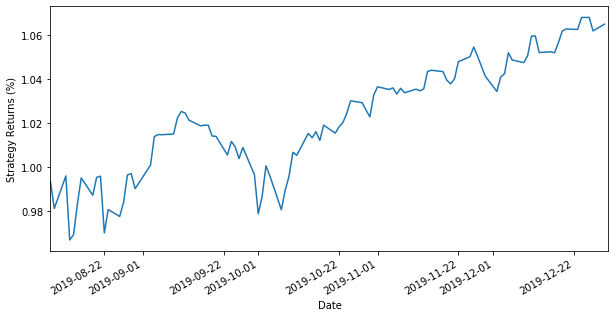

In [17]:
# Predicted Signal
Df['Predicted_Signal'] = classifierRF.predict(X)

# Calculate daily returns
Df['Return'] = (Df['Close'].shift(-1) - Df['Close'])/Df['Close']

# Calculate strategy returns
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

# Calculate geometric returns
geometric_returns = (Df.Strategy_Return.iloc[split:]+1).cumprod()

# Plot geometric returns
geometric_returns.plot(figsize=(10,5))
plt.ylabel("Strategy Returns")
plt.xlabel("Date")
plt.show()